<h1>NumPy</h1>

In [6]:
import numpy as np

In [ ]:
precos = np.array([10.4, 40.2, 100, 22.46])
idades = np.array([12, 13, 14, 15])

In [ ]:
# Calcular estatísticas
print("Média:", np.mean(precos))
print("Mínimo:", np.min(precos))
print("Máximo:", np.max(precos))

In [ ]:
# Simular aumento de 10% nos preços
precos_aumentados = precos * 1.1
precos_aumentados

In [ ]:
# Idades daqui 2 anos
idades_mais_2 = idades + 2
idades_mais_2

<h2>Exercício:</h2>
<h4>Dada a seguinte lista de idades: [24, 25, 26, 44], crie um numpy array dessa lista, retorne a maior e a menor idade, seguida da sua média.</h4>
<h4>Por fim, retorne como seriam as idades 2 anos atrás, utilizando operações em NumPy Array</h4>

<h1>Pandas</h1>

In [15]:
import pandas as pd

In [16]:
# Criando um DataFrame do zero
data = {
    "Produto": ["TV", "Monitor", "Notebook"],
    "Preço": [1500, 800, 3500],
    "Estoque": [10, 20, 5]
}
df_exemplo = pd.DataFrame(data)
print(df_exemplo)


    Produto  Preço  Estoque
0        TV   1500       10
1   Monitor    800       20
2  Notebook   3500        5


In [17]:
df = pd.read_csv('FAKE_DATA.csv')

In [18]:
df.head()

,product_id,model_suffix,division,selling_price,sales_qty,production_qty,material_rate,customer_name,customer_email,customer_country
0,1.0,Pastry - Apple Muffins - Mini,TV,368.92,707,5/26/2022,0.57,Geri Sheppard,gsheppard0@aboutads.info,Ukraine
1,NaN,NaN,TV,7.95,495,7/20/2022,0.53,Hanson Vowells,hvowells1@printfriendly.com,Azerbaijan
2,3.0,Capers - Ox Eye Daisy,MNT,430.14,776,10/28/2022,0.51,Ernesta Neylon,eneylon2@army.mil,Portugal
3,NaN,Sobe - Cranberry Grapefruit,TV,694.57,91,8/20/2022,0.62,Celle Mariet,cmariet3@nps.gov,Ukraine
4,5.0,Peas Snow,Caraud,180.83,268,6/9/2022,0.51,Pearl Whelband,NaN,Poland


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
# Filtrar produtos acima de R$ 300
df_filtrado = df[df["selling_price"] > 300]
print(df_filtrado)

# Ordenar por preço de venda
df_sorted = df.sort_values(by="selling_price", ascending=False)
print(df_sorted)

# Média de vendas por divisão
media_divisao = df.groupby("division")["sales_qty"].mean()
media_divisao

     product_id                       model_suffix   division  selling_price  \
0           1.0      Pastry - Apple Muffins - Mini         TV         368.92   
2           3.0              Capers - Ox Eye Daisy        MNT         430.14   
3           NaN        Sobe - Cranberry Grapefruit         TV         694.57   
6           7.0                  Alize Red Passion  Projector         601.62   
7           8.0            Cheese - Havarti, Salsa  Projector         822.88   
..          ...                                ...        ...            ...   
994       995.0               Pecan Raisin - Tarts        MNT         789.51   
996         NaN          Jolt Cola - Electric Blue  Projector         917.79   
997       998.0  Wine - Semi Dry Riesling Vineland         TV         638.40   
998         NaN   Sparkling Wine - Rose, Freixenet     Caraud         978.29   
999         NaN          Bag - Regular Kraft 20 Lb        MNT         760.50   

     sales_qty production_qty  material

division
Caraud       474.677778
Cooking      518.333333
MNT          510.752475
Projector    492.194175
TV           512.770732
Name: sales_qty, dtype: float64

In [21]:
# Produtos vendidos acima de 500 unidades
df_vendas_altas = df[df["sales_qty"] > 500]
print(df_vendas_altas)

# Ordenar os produtos pela quantidade de produção
df_sorted = df.sort_values(by="production_qty", ascending=False)
print(df_sorted)

# Média de material rate por país de cliente
media_material = df.groupby("customer_country")["material_rate"].mean()
print(media_material)


     product_id                       model_suffix   division  selling_price  \
0           1.0      Pastry - Apple Muffins - Mini         TV         368.92   
2           3.0              Capers - Ox Eye Daisy        MNT         430.14   
7           8.0            Cheese - Havarti, Salsa  Projector         822.88   
12          NaN                    Cream Of Tartar     Caraud         464.62   
13         14.0                       Cabbage Roll         TV         118.81   
..          ...                                ...        ...            ...   
994       995.0               Pecan Raisin - Tarts        MNT         789.51   
996         NaN          Jolt Cola - Electric Blue  Projector         917.79   
997       998.0  Wine - Semi Dry Riesling Vineland         TV         638.40   
998         NaN   Sparkling Wine - Rose, Freixenet     Caraud         978.29   
999         NaN          Bag - Regular Kraft 20 Lb        MNT         760.50   

     sales_qty production_qty  material

In [22]:
# Exportar para CSV
df.to_csv("dados_processados.csv", index=False)

# Exportar para Excel
df.to_excel("dados_processados.xlsx", sheet_name="Dados", index=False)


ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
with pd.ExcelWriter("relatorio.xlsx") as writer:
    df_vendas_altas.to_excel(writer, sheet_name="Vendas Altas", index=False)
    df_sorted.to_excel(writer, sheet_name="Ordenado por Preço", index=False)

<h1>Bônus - MatPlotLib</h1>

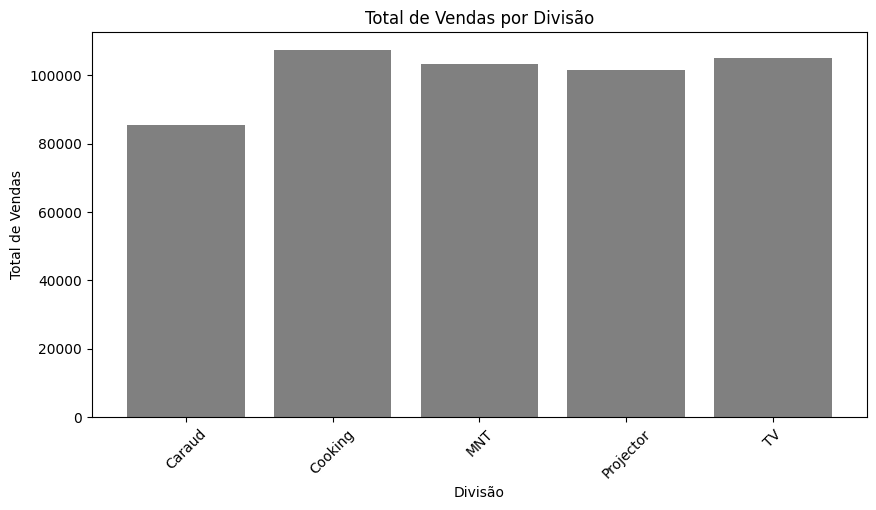

In [ ]:
import matplotlib.pyplot as plt

# Agrupar as vendas por divisão
vendas_por_divisao = df.groupby("division")["sales_qty"].sum()

# Criar o gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(vendas_por_divisao.index, vendas_por_divisao.values, color="royalblue")
plt.xlabel("Divisão")
plt.ylabel("Total de Vendas")
plt.title("Total de Vendas por Divisão")
plt.xticks(rotation=45)  # Rotacionar rótulos no eixo X
plt.show()


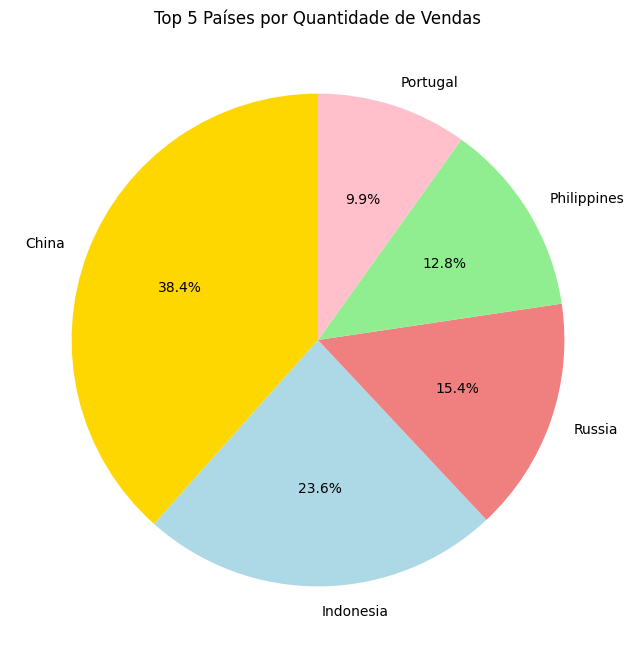

In [29]:
# Agrupar as vendas por país e selecionar os 5 principais
vendas_por_pais = df.groupby("customer_country")["sales_qty"].sum()
vendas_top5 = vendas_por_pais.nlargest(5)  # Pegar os 5 maiores países

# Criar o gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(vendas_top5, labels=vendas_top5.index, autopct="%1.1f%%", startangle=90, colors=["gold", "lightblue", "lightcoral", "lightgreen", "pink"])
plt.title("Top 5 Países por Quantidade de Vendas")
plt.show()


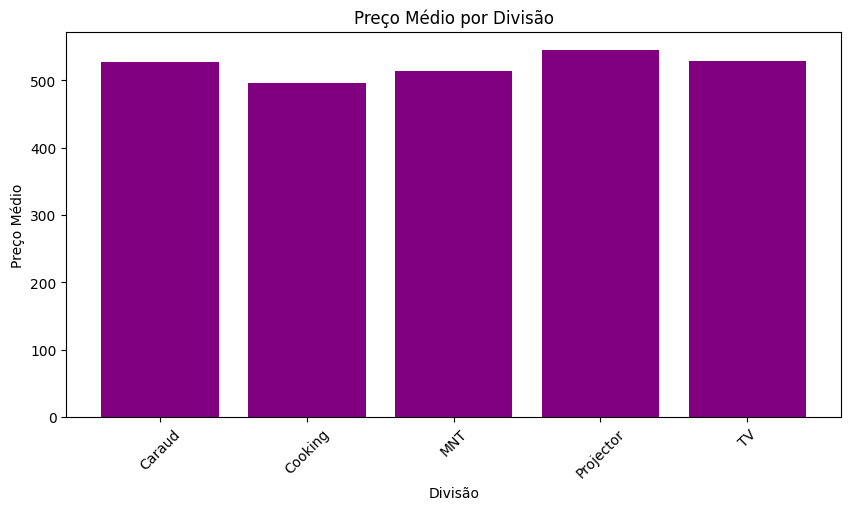

In [31]:
# Agrupar o preço médio por divisão
preco_medio_por_divisao = df.groupby("division")["selling_price"].mean()

# Criar um gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(preco_medio_por_divisao.index, preco_medio_por_divisao.values, color="purple")
plt.xlabel("Divisão")
plt.ylabel("Preço Médio")
plt.title("Preço Médio por Divisão")
plt.xticks(rotation=45)
plt.show()